In [42]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("C:/Users/민지/Downloads/abalone.data", index_col = None, header = None)
data.head()

,0,1,2,3,4,5,6,7,8
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [43]:
data.isnull().sum()

0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
8    0
dtype: int64

In [49]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in data.columns:
    data[i] = le.fit_transform(data[i])

In [50]:
X = data.iloc[:,0:7].values
y = data.iloc[:,7].values

from sklearn.preprocessing import LabelEncoder
encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)

Y = pd.get_dummies(y1).values


from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = train_test_split(X,Y,test_size=0.2,random_state=0) 

In [51]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(100, activation = 'elu', input_shape = (7,)))
model.add(Dense(50, activation = 'elu'))
model.add(Dense(30, activation = 'elu'))
model.add(Dense(1)) 
model.compile(optimizer = 'rmsprop', loss = 'mse', metrics = ['mse'])

model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 100)               800       
                                                                 
 dense_28 (Dense)            (None, 50)                5050      
                                                                 
 dense_29 (Dense)            (None, 30)                1530      
                                                                 
 dense_30 (Dense)            (None, 1)                 31        
                                                                 
Total params: 7,411
Trainable params: 7,411
Non-trainable params: 0
_________________________________________________________________


In [52]:
N_EPOCHS = 100
history = model.fit(X_train, y_train, epochs = N_EPOCHS, validation_data=(X_test, y_test))

Epoch 1/100
105/105 [==============================] - 1s 3ms/step - loss: 336.1710 - mse: 336.1710 - val_loss: 2.4837 - val_mse: 2.4837
Epoch 2/100
105/105 [==============================] - 0s 2ms/step - loss: 114.2075 - mse: 114.2075 - val_loss: 3.3297 - val_mse: 3.3297
Epoch 3/100
105/105 [==============================] - 0s 2ms/step - loss: 53.3622 - mse: 53.3622 - val_loss: 3.0847 - val_mse: 3.0847
Epoch 4/100
105/105 [==============================] - 0s 2ms/step - loss: 19.5846 - mse: 19.5846 - val_loss: 40.1459 - val_mse: 40.1459
Epoch 5/100
105/105 [==============================] - 0s 2ms/step - loss: 7.9338 - mse: 7.9338 - val_loss: 0.8081 - val_mse: 0.8081
Epoch 6/100
105/105 [==============================] - 0s 2ms/step - loss: 3.3820 - mse: 3.3820 - val_loss: 3.6761 - val_mse: 3.6761
Epoch 7/100
105/105 [==============================] - 0s 2ms/step - loss: 1.6363 - mse: 1.6363 - val_loss: 0.2001 - val_mse: 0.2001
Epoch 8/100
105/105 [==============================] - 

105/105 [==============================] - 0s 2ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 63/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0027 - mse: 0.0027 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 64/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0029 - val_mse: 0.0029
Epoch 65/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 66/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0047 - val_mse: 0.0047
Epoch 67/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0028 - mse: 0.0028 - val_loss: 0.0026 - val_mse: 0.0026
Epoch 68/100
105/105 [==============================] - 0s 2ms/step - loss: 0.0026 - mse: 0.0026 - val_loss: 0.0033 - val_mse: 0.0033
Epoch 69/100
105/105 [==============================] - 0s 2ms/step - loss:

In [53]:
model.evaluate(X_test, y_test)

27/27 [==============================] - 0s 1ms/step - loss: 0.0018 - mse: 0.0018


[0.0018307124264538288, 0.0018307124264538288]

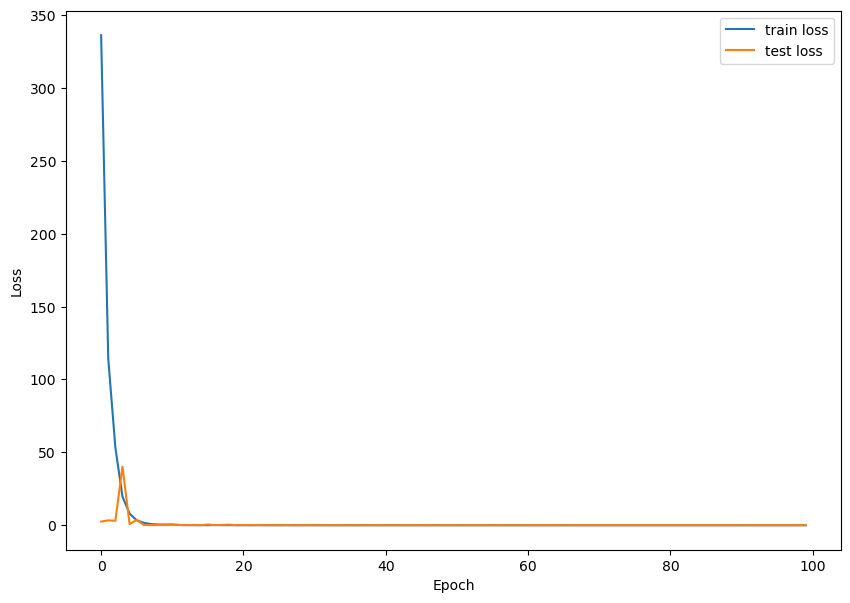

In [54]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['loss'], label='train loss')
plt.plot(range(N_EPOCHS), history.history['val_loss'], label='test loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

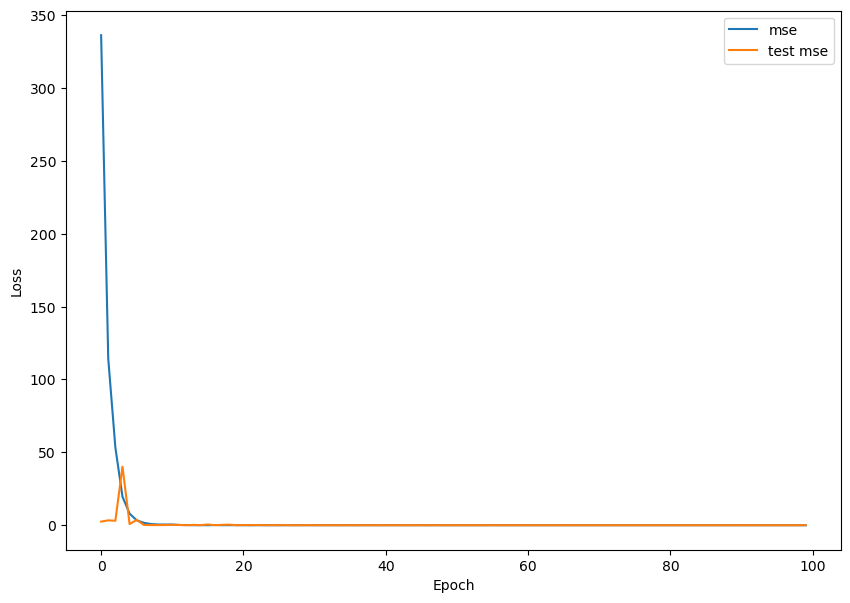

In [55]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,7))
plt.plot(range(N_EPOCHS), history.history['mse'], label='mse')
plt.plot(range(N_EPOCHS), history.history['val_mse'], label='test mse')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()